In [1]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

Add Google Drive to Directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the Training Data

In [3]:
import pandas as pd
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/ECGR 4106 - Real Time Machine Learning/Intro to ML/Intro to ML/Homework/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
spectrain = housing[num_vars] 
spectrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


Price Prediction

In [5]:
t_area = torch.tensor(spectrain['area'])
t_bedrooms = torch.tensor(spectrain['bedrooms'])
t_bathrooms = torch.tensor(spectrain['bathrooms'])
t_stories = torch.tensor(spectrain['stories'])
t_parking = torch.tensor(spectrain['parking'])
t_price = torch.tensor(spectrain['price'])

Normalize

In [6]:

t_areaN = t_area / max(spectrain['area'])
t_bedroomsN = t_bedrooms / max(spectrain['bedrooms'])
t_bathroomsN = t_bathrooms / max(spectrain['bathrooms'])
t_storiesN = t_stories / max(spectrain['stories'])
t_parkingN = t_parking / max(spectrain['parking'])

Define the Model

In [7]:
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

Calculate the Loss

In [8]:
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

Parameters

In [9]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [10]:
params.grad is None

True

In [11]:
loss = loss_fn(model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params), t_price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [12]:
if params.grad is not None:
    params.grad.zero_()

Define the Training Loop

In [13]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

Loss When Learning Rate = 0.1

In [14]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


Loss When Learning Rate = 0.01

In [15]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 2024805761024.000000
Epoch 1000, Loss 1863258734592.000000
Epoch 1500, Loss 1768051179520.000000
Epoch 2000, Loss 1704594898944.000000
Epoch 2500, Loss 1659788853248.000000
Epoch 3000, Loss 1627244199936.000000
Epoch 3500, Loss 1603242295296.000000
Epoch 4000, Loss 1585383211008.000000
Epoch 4500, Loss 1572023042048.000000
Epoch 5000, Loss 1561993281536.000000


Loss When Learning Rate = 0.001

In [16]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 3072061341696.000000
Epoch 1000, Loss 2296906776576.000000
Epoch 1500, Loss 2232370855936.000000
Epoch 2000, Loss 2193781817344.000000
Epoch 2500, Loss 2159230582784.000000
Epoch 3000, Loss 2127642755072.000000
Epoch 3500, Loss 2098654216192.000000
Epoch 4000, Loss 2071965073408.000000
Epoch 4500, Loss 2047316459520.000000
Epoch 5000, Loss 2024483717120.000000


Loss When Learning Rate = 0.0001

In [17]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 19251110871040.000000
Epoch 1000, Loss 14310294159360.000000
Epoch 1500, Loss 10812095725568.000000
Epoch 2000, Loss 8334880538624.000000
Epoch 2500, Loss 6580248510464.000000
Epoch 3000, Loss 5337011716096.000000
Epoch 3500, Loss 4455729725440.000000
Epoch 4000, Loss 3830616424448.000000
Epoch 4500, Loss 3386812137472.000000
Epoch 5000, Loss 3071338610688.000000


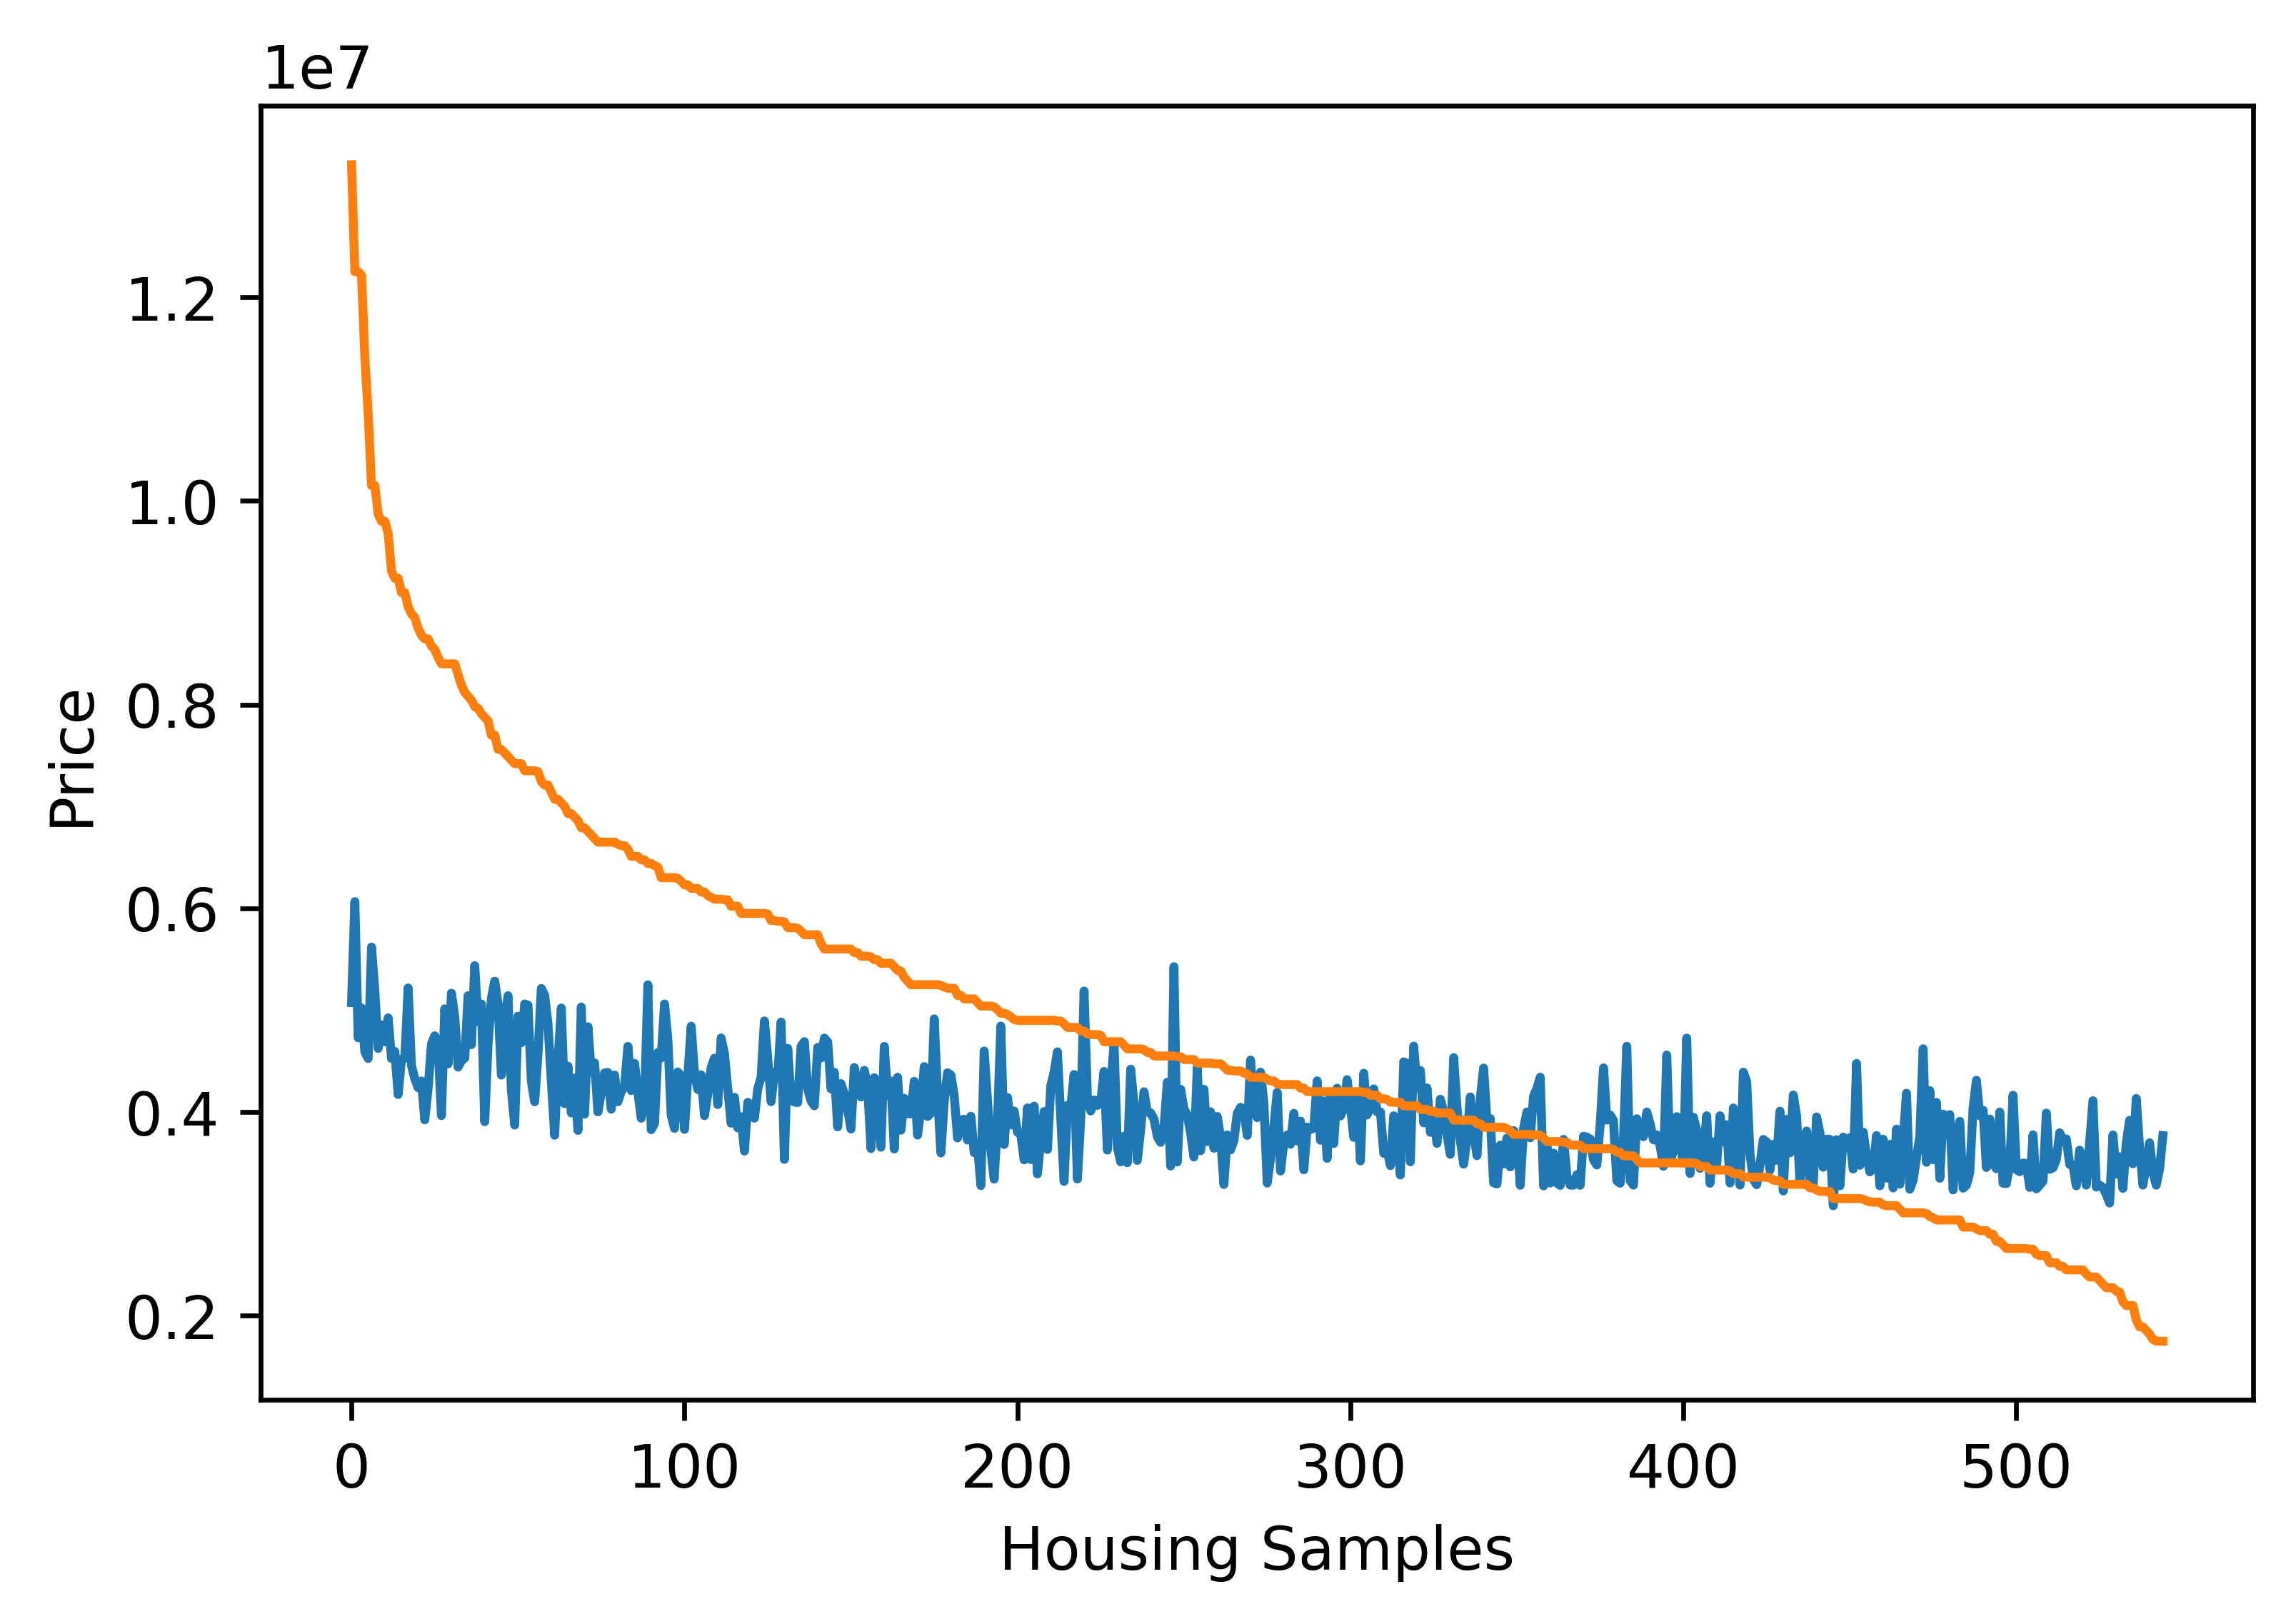

In [18]:
%matplotlib inline
#t_area, t_bedrooms, t_bathrooms, t_stories, t_parking
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Housing Samples")
plt.ylabel("Price")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)